# Evaluation of the occlusion sensitivity experiments
These Notebook evaluates the first try of occlusion sensitivity. A patch is occluded in the source and the generator separates the signal. This can be compared to the unperturbed generation. Based on the difference in the correlation coefficient, we defined a score to show which occluded patch has the most overall relevance. 

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from xai_dataloader import XAIDataLoader
from xai_calc import calc_importance
from xai_plot import plot_r_occ_sample, plot_perturbed_map, plot_occlusion_sensitivity

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


The next cell needs user input:

In [2]:
base_output_dir = "../output/" # Meanwhile I have my own output directory with GAN results
names = ['test', 'xai_exp_occlusion' ]
results_dir = "../output/xai_occlusion_results/"
nrun = 0
nindex = 1
#suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]
total_n_occ = 16
suffix=f"run71_index0" #what is wrong with run60_index0? 71

## Evaluation of single samples

In [ ]:
plot_r_occ_sample(base_output_dir, names[0], names[1], results_dir, 1024, suffix)

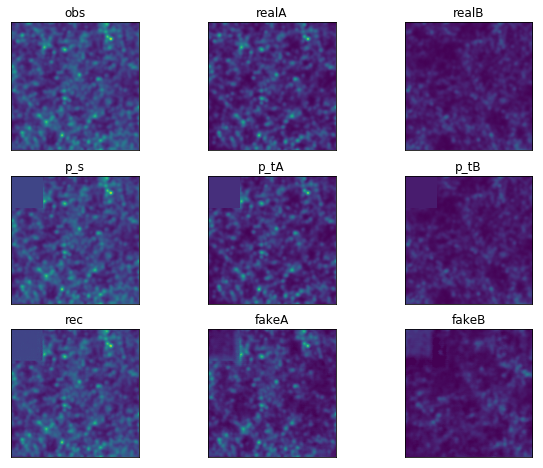

In [3]:
for i in range(1):
    df = XAIDataLoader(base_output_dir, names[1], suffix, n_occ=i)
    plot_perturbed_map(df, results_dir, names[1], n_occ=i, suffix=suffix)

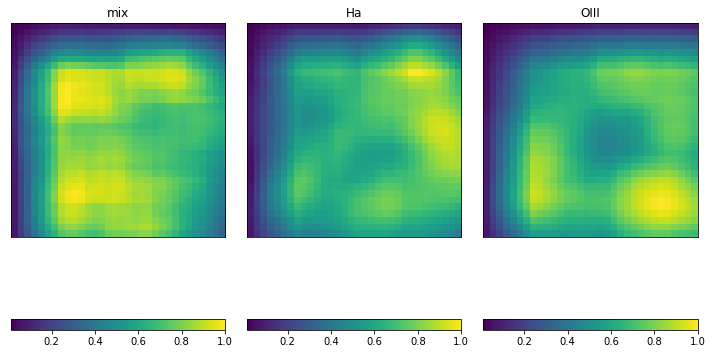

In [4]:
im_mix, im_ha, im_oiii = calc_importance(base_output_dir, names[0], names[1], 1024, suffix, stride=8, nbins=20, log_bins=True)
plot_occlusion_sensitivity(im_mix, im_ha, im_oiii, results_dir)    

I am not sure about this plot. The problem is that we occluded the inner pixels many times more often so I assume they have more impact on the absolute number. I think the pattern arises mainly from the occlusion rather than the underlying signal. Not convincing at this moment!